In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
import string
from spacy.lang.en import English
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [3]:
# Loading TSV file
df_amazon = pd.read_csv ("/content/drive/MyDrive/NLP/IMDB Dataset.csv/IMDB Dataset.csv")
df_amazon.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Shape of dataframe
df_amazon.shape

(50000, 2)

In [5]:
# View data information
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# Feedback Value count
df_amazon.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
#Take only 5000 samples data and add the data
label_0=df_amazon[df_amazon['sentiment']=='positive'].sample(n=2500)
label_1=df_amazon[df_amazon['sentiment']=='negative'].sample(n=2500)
data=pd.concat([label_1,label_0])

In [8]:
from sklearn.utils import shuffle
data=shuffle(data)
data.head()

,review,sentiment
7410,seriously people need to lighten up and just a...,positive
49080,Two escaped convicts step out of the woods and...,negative
49180,"a romance without feeling, a drama of issues w...",negative
32838,Let's face it.<br /><br />This movie is incred...,positive
27986,"The first thing you should know about ""Zipperf...",negative


In [ ]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
positive = ''
negative = ''

for val in data[data['sentiment'] == 'positive'].review:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        positive = positive + words + ' '
        
for val in data[data['sentiment'] == 'negative'].review:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        negative = negative + words + ' '

In [ ]:
from wordcloud import WordCloud

stopwords = set(STOP_WORDS)
stopwords.add("br")
stopwords.add("S")

positive_wordcloud = WordCloud(width=500, height=300,stopwords=stopwords,background_color="grey").generate(positive)
negative_wordcloud = WordCloud(width=500, height=300,stopwords=stopwords,background_color="grey").generate(negative)

**Positive Reviews word cloud**

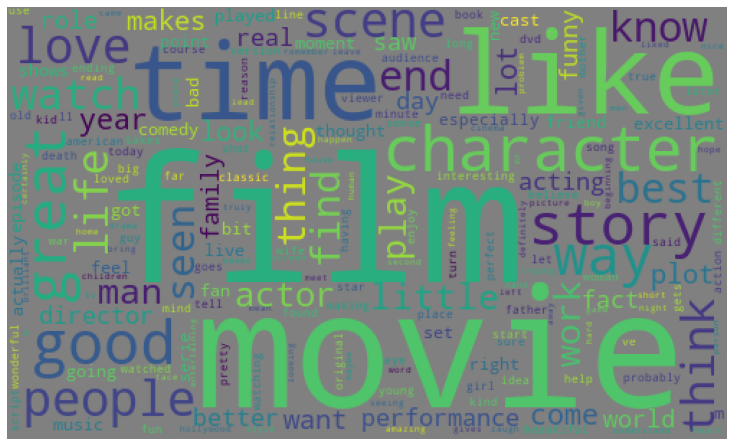

In [ ]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Negative Reviews word cloud**

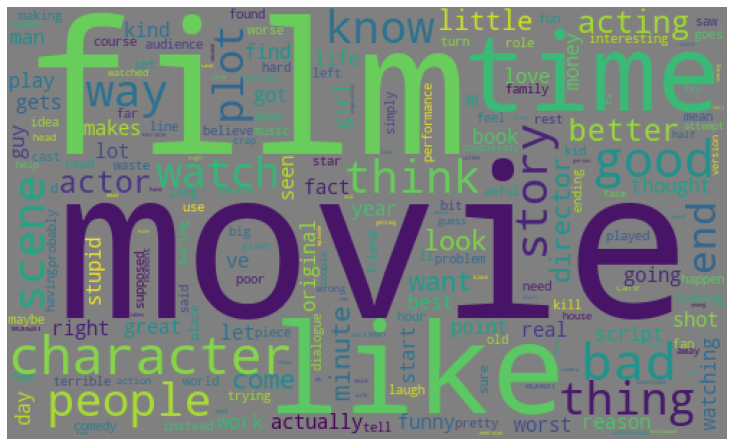

In [ ]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [10]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [11]:
nlp = en_core_web_sm.load()
#nlp = spacy.load('en')

# To build a list of stop words for filtering
stopwords = list(STOP_WORDS)
print(stopwords)

['its', 'anyway', 'during', 'then', 'much', 'twenty', 'be', '’m', 'forty', 'whenever', 'before', 'hereafter', 'yourself', 'top', 'sometime', 'hers', 'somehow', 'seeming', 'also', 'either', 'itself', 'whither', 'but', 'more', '’re', 'if', 'against', 'of', 'really', 'third', 'towards', 'where', 're', 'that', 'put', 'doing', 'sixty', 'does', '’ve', 'thereby', 'become', 'you', 'via', 'meanwhile', 'ourselves', 'did', 'n’t', 'whether', 'front', 'six', 'a', "'s", 'becoming', 'i', 'show', 'about', 'back', 'would', 'afterwards', 'per', 'five', 'herself', 'thereafter', 'do', 'sometimes', 'always', 'by', 'twelve', 'each', 'everywhere', 'whole', 'after', 'his', 'are', 'me', 'used', 'though', 'ours', 'onto', 'yours', 'say', 'them', 'within', 'such', 'herein', 'well', 'seemed', 'various', 'how', 'under', 'wherever', 'ca', 'quite', 'am', 'something', 'these', 'or', 'because', 'beforehand', 'go', 'being', 'an', 'using', '‘d', 'in', 'they', 'now', 'were', 'other', 'upon', 'will', 'nobody', 'one', 'done

In [12]:
#punctuation marks
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
#defining a tokenizer
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()  # Lemmatizing each token and converting each token into lowercase

        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:     # Removing stop words, punctuation marks.
            cleaned_tokens.append(token)

    # return preprocessed list of tokens
    return cleaned_tokens 

In [14]:
text_data_cleaning("    Hello how are you. Like this video")

['hello', 'like', 'video']

In [15]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [16]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [17]:
bow_vector = CountVectorizer(tokenizer = text_data_cleaning  , ngram_range=(1,1))

In [18]:
tfidf_vector = TfidfVectorizer(tokenizer = text_data_cleaning , min_df=1)


In [19]:
from sklearn.model_selection import train_test_split

X = data['review'] # the features we want to analyze
ylabels = data['sentiment'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [20]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
classifier = RandomForestClassifier(n_estimators = 100,n_jobs=-1)

# Create pipeline using Bag of Words
pipe_bow = Pipeline([("cleaner", predictors()),('bow', bow_vector), ('clf', classifier)])

# model generation
pipe_bow.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f7afb708fd0>),
                ('bow',
                 CountVectorizer(tokenizer=<function text_data_cleaning at 0x7f7afcb21290>)),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [21]:
y_pred_bow = pipe_bow.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred_bow))

              precision    recall  f1-score   support

    negative       0.83      0.84      0.84       740
    positive       0.84      0.84      0.84       760

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

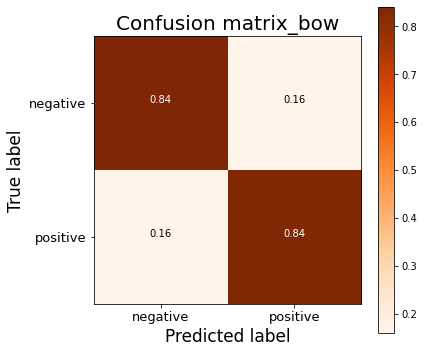

In [24]:
confusion_matrix_bow=confusion_matrix(y_test,y_pred_bow)
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_bow, classes=['negative','positive'], title="Confusion matrix_bow")
plt.show()

In [25]:
# Create pipeline using Tfidf
pipe_tfidf = Pipeline([("cleaner", predictors()),('tfidf', tfidf_vector), ('clf', classifier)])

# model generation
pipe_tfidf.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f7af7847d50>),
                ('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f7afcb21290>)),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [26]:
y_pred_tfidf = pipe_bow.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

    negative       0.70      0.89      0.79       740
    positive       0.86      0.63      0.73       760

    accuracy                           0.76      1500
   macro avg       0.78      0.76      0.76      1500
weighted avg       0.78      0.76      0.76      1500



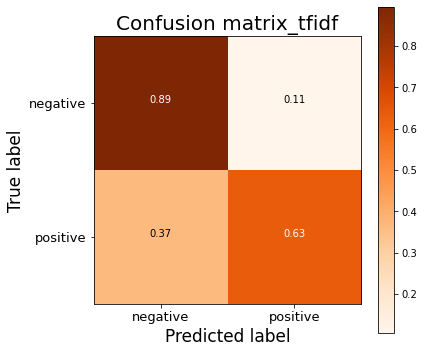

In [28]:
confusion_matrix_tfidf = confusion_matrix(y_test,y_pred_tfidf)
plt.figure(figsize=(6,6))
plot_confusion_matrix(confusion_matrix_tfidf, classes=['negative','positive'], title="Confusion matrix_tfidf")
plt.show()

USING **LSTM**

In [29]:
from keras.datasets import imdb
import pickle


In [30]:
vocabulary_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

17473536/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [31]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 2, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [32]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

1654784/1641221 [==============================] - 0s 0us/step
---review with words---
['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'and', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', 'and', 'br',

In [33]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


PAD SEQUENCE

In [34]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [35]:
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [37]:
batch_size = 64
num_epochs = 15
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs).history

Epoch 1/15
390/390 [==============================] - 17s 26ms/step - loss: 0.4927 - accuracy: 0.7503 - val_loss: 0.2956 - val_accuracy: 0.9219
Epoch 2/15
390/390 [==============================] - 10s 25ms/step - loss: 0.2797 - accuracy: 0.8883 - val_loss: 0.2647 - val_accuracy: 0.9062
Epoch 3/15
390/390 [==============================] - 10s 25ms/step - loss: 0.2099 - accuracy: 0.9216 - val_loss: 0.2936 - val_accuracy: 0.9062
Epoch 4/15
390/390 [==============================] - 10s 25ms/step - loss: 0.1661 - accuracy: 0.9390 - val_loss: 0.2501 - val_accuracy: 0.9062
Epoch 5/15
390/390 [==============================] - 10s 25ms/step - loss: 0.1335 - accuracy: 0.9531 - val_loss: 0.4238 - val_accuracy: 0.8906
Epoch 6/15
390/390 [==============================] - 10s 25ms/step - loss: 0.1115 - accuracy: 0.9627 - val_loss: 0.2700 - val_accuracy: 0.9062
Epoch 7/15
390/390 [==============================] - 10s 25ms/step - loss: 0.1676 - accuracy: 0.9352 - val_loss: 0.5109 - val_accuracy:

In [38]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8467599749565125


In [39]:
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [40]:
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))

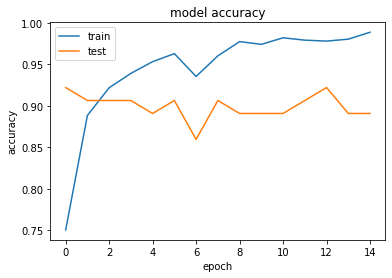

In [41]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

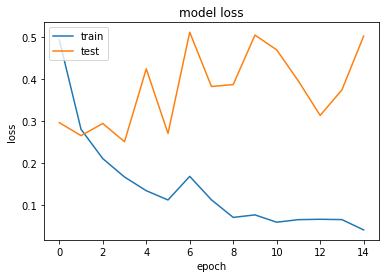

In [42]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');